In [1]:
import pandas as pd

In [42]:
df = pd.read_csv('Datasets/digit-recognizer/train.csv')
df.shape

(42000, 785)

In [44]:
x = df.iloc[:,1:]
y = df.iloc[:,0]

In [43]:
from sklearn.model_selection import train_test_split

In [45]:
x_train,x_test, y_train, y_test = train_test_split(x,y,train_size=0.7,random_state=42)

In [46]:
# creating a decision tree classifier
from sklearn import tree

In [47]:
dt_clf = tree.DecisionTreeClassifier(max_depth=)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [48]:
# visualize the decision tree
import graphviz


In [49]:
dot_data = tree.export_graphviz(dt_clf, out_file=None,
                                feature_names=x_train.columns.tolist(),
                                class_names=[str(i) for i in y_train.values],
                                filled=True, rounded=True,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [50]:
#predict on sample test case
import matplotlib.pyplot as plt

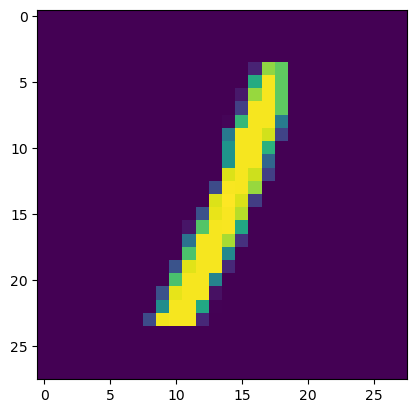

In [51]:
sample = x_train.iloc[100].to_numpy()
plt.imshow(sample.reshape(28,28))

In [52]:
dt_clf.predict(sample.reshape(1,784))

/Users/yash/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [53]:
from sklearn.metrics import accuracy_score
y_pred = dt_clf.predict(x_test)


In [54]:
print("accuracy_score : ",accuracy_score(y_test,y_pred))

accuracy_score :  0.8459646059836521


In [56]:
#knowing the default values of the parameters
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

# Hyperparameter Tuning

In [58]:
param_dist = {
    'criterion': ['gini','entropy'],
    'max_depth': [4,5,6,7,8,9,None],                #max depth can be log2(784)= 9.6 so we can choose different depths
}

In [59]:
from sklearn.model_selection import GridSearchCV

In [60]:
grid = GridSearchCV(dt_clf,param_grid=param_dist,cv=10,n_jobs=-1)

In [61]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8, 9, None]})

In [62]:
#get the best estimator ( tree here ) params
grid.best_estimator_

DecisionTreeClassifier(criterion='entropy')

In [63]:
grid.best_params_

{'criterion': 'entropy', 'max_depth': None}

In [64]:
grid.best_score_  # best accuracy got after hyperparameter tuning ( depth and criterion )

0.8581584161395078